In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 

In [11]:
train_data = pd.read_csv('/content/sample_data/mnist_train_small.csv', header =  None)
print(train_data.shape)
train_data.head()

(20000, 785)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
x_train=np.array(train_data.iloc[:,1:])
y_train= np.array(train_data.iloc[:,0]).reshape(-1,1)
m=len(y_train)
ones=np.full((m,1),1)
x_train = preprocessing.normalize(x_train)
x_train=np.concatenate((ones,x_train),axis=1)
x_train=np.asmatrix(x_train)
y_train=np.asmatrix(y_train)
(row,col)=np.shape(x_train)


In [17]:
#initialising the parameters
theta = np.zeros((col,1))
alpha = 1
num_iters = 1000

In [18]:
#cost funtion
def cost_function(x,y,theta):
 square_error = np.power((x*theta-y),2)
 cost = np.sum(square_error)/(2*m)
 return cost

In [19]:
#initial cost
cost=cost_function(x_train,y_train,theta)
print(cost)

14.17515


In [20]:
#Gradient desent
def gradient_descent(x,y,theta,alpha,iters):
 iteration = [0]
 cost_list = [cost_function(x_train,y_train,theta)]
 for i in range (iters) :
  cost = cost_function(x,y,theta)
  theta = theta - (alpha/m)*((x.T)*(x*theta - y))
  iteration.append(i)
  cost_list.append(cost)
 return (theta,cost_list,iteration)

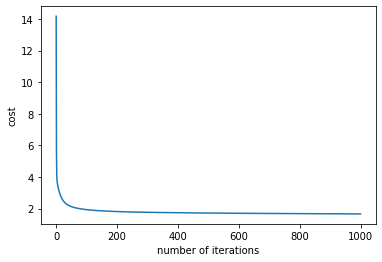

In [21]:
(theta,cost_list,iteration) = gradient_descent(x_train,y_train,theta,alpha,num_iters)
plt.plot(iteration,cost_list)
plt.xlabel('number of iterations')
plt.ylabel('cost')
plt.show()

In [22]:
print('initial cost :',cost_list[0])
print('final cost :',cost_list[num_iters-1])

initial cost : 14.17515
final cost : 1.6581915866347396


In [23]:
print(theta)

[[ 1.87080277e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.18918835e-04]
 [-4.72864683e-03]
 [-4.72864683e-03]
 [-1.97026951e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.25749451e-03]
 [ 1.61872555e-02]
 [ 3.24516841e-02]
 [ 3.48394309e-02]
 [ 4.98273467e-02]
 [ 3.63088867e-02]
 [ 6.35618816e-02]
 [ 4.50037456e-02]
 [ 5.84798749e-02]
 [ 7.19943134e-02]
 [ 6.23858706e-02]
 [ 4.34121639e-02]
 [ 6.77853774e-02]
 [ 2.65227851e-02]
 [ 1.42995156e-02]
 [ 1.36517364e-03]
 [ 0.00000000e+00]
 [ 0.0000000

In [25]:
test_data = pd.read_csv('/content/sample_data/mnist_test.csv' , header = None)
x_test=np.array(test_data.iloc[:,1:785])
y_test= np.array(test_data.iloc[:,0]).reshape(-1,1)
m=len(y_test)
ones=np.full((m,1),1)
x_test = preprocessing.normalize(x_test)
x_test=np.concatenate((ones,x_test),axis=1)
x_test=np.asmatrix(x_test)
y_test=np.asmatrix(y_test)
y_pred = x_test*theta 

In [26]:
print('y_predicted is:\n' , y_pred)
print('y_test is:\n' , y_test)

y_predicted is:
 [[6.17899513]
 [2.57123886]
 [0.93557734]
 ...
 [7.53027968]
 [4.60202272]
 [4.05823127]]
y_test is:
 [[7]
 [2]
 [1]
 ...
 [4]
 [5]
 [6]]


In [27]:
print('cost for test data is :' , cost_function(x_test,y_test,theta))

cost for test data is : 1.617245096727301
